# Clasificación: Regresión Logística

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import seaborn as sns

En este notebook vamos a estudiar los conceptos básicos de Clasificación y como podemos aplicarla usando la API de scikit-learn. Nos focalizaremos en Regresión Logística, pero veréis que es muy fácil aplicar otros algoritmos con la api de scikit-learn.

Para empezar, vamos a crear un dataset sintético que podamos aplicar en nuestro primer problema de clasificación.
Será un problema de clasificación binaria en el que, para ir entendiendo los conceptos, sólo utilizaremos dos predictores.

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=0, n_samples=200)

print('X ~ n_samples x n_features:', X.shape)
print('y ~ n_samples:', y.shape)

print('\nFirst 5 samples:\n', X[:5, :])
print('\nFirst 5 labels:', y[:5])

X ~ n_samples x n_features: (200, 2)
y ~ n_samples: (200,)

First 5 samples:
 [[2.8219307  1.25395648]
 [1.65581849 1.26771955]
 [3.12377692 0.44427786]
 [1.4178305  0.50039185]
 [2.50904929 5.7731461 ]]

First 5 labels: [1 1 1 1 0]


Como hemos hecho que nuestros datos sean bidimiensionales, podemos mostrarlos en un plot 2D donde la primera característica corresponda al eje *x* y la segunda característica al eje *y*.

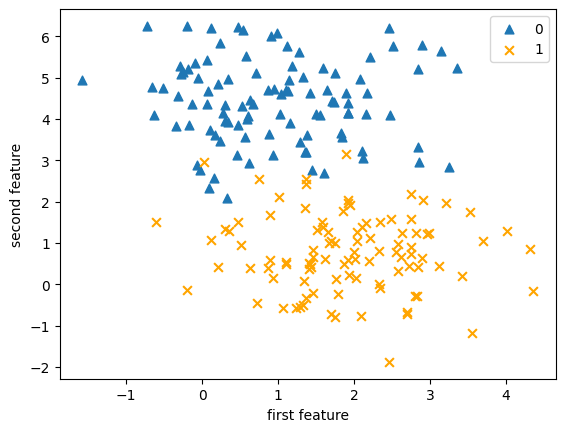

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel('first feature')
plt.ylabel('second feature')
plt.legend(loc='upper right');

Para evaluar los modelos que vamos a crear, vamos a separar el dataset en *train* y *test*. Recordad que estos dos conjuntos nos permiten:

1. **Training**: Ajustar el modelo a los datos de entrenamiento.
2. **Test**: Evaluar la capacidad de generalizar del modelo.


Para separar los dos conjuntos utilizamos la función `train_test_split` del módulo `model_selection`. Separaremos ambos conjuntos con un ratio de 75/25.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1234,
                                                    stratify=y)   # Atención: pasamos la "y"

In [ ]:
X_train.shape

(150, 2)

In [ ]:
y_train.shape

(150,)

Todos los algoritmos implementados en scikit-learn están expuestos en su API mediante objetos de tipo *Estimator*, que garantiza que todos los modelos disponen de la misma API:

- `Estimator.`**`fit(X, y)`**: ajusta los parámetros del modelo a los datos
- `Estimator.`**`predict(X)`**: predicce los valores de salida para datos nuevos
- `Estimator.`**`score(X, y)`**: evalúa los resultados de la predicción

Nosotros utilizaremos el objeto LogisticRegression para nuestra tarea de clasificación:

In [ ]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

Para entrenar el modelo, simplemente tenemos que llamar al método **`fit`** de nuestro objeto `classifier`, indicándole los datos de entrenamiento y las etiquetas asociadas a esos datos:

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Una vez tenemos el modelo entrenado, podemos empezar a realizar predicciones con datos nuevos:

In [ ]:
prediction = classifier.predict(X_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1])

In [ ]:
classifier.predict_proba(X_test).round(2)

array([[0.15, 0.85],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.01, 0.99],
       [0.97, 0.03],
       [0.97, 0.03],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.06, 0.94],
       [0.49, 0.51],
       [0.41, 0.59],
       [0.91, 0.09],
       [0.16, 0.84],
       [0.1 , 0.9 ],
       [0.81, 0.19],
       [0.02, 0.98],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.6 , 0.4 ],
       [0.86, 0.14],
       [1.  , 0.  ],
       [0.02, 0.98],
       [0.97, 0.03],
       [0.95, 0.05],
       [0.57, 0.43],
       [1.  , 0.  ],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.96, 0.04],
       [0.06, 0.94],
       [0.18, 0.82],
       [0.01, 0.99],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.01, 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.06, 0.94],
       [0.65, 0.35],
       [0.02, 0.98],
       [0.  , 1.  ],
       [0.99,

Podemos comparar visualmente las predicciones con los valores de $y$ reales:

In [ ]:
print(prediction[:20])
print(y_test[:20])

[1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 0]
[1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0]


Para evaluarlo cuantitativamente, podemos computar qué fracción de las predicciones es correcta. A esta métrica se le llama **accuracy**:

In [ ]:
np.mean(prediction == y_test)

0.86

Por supuesto, scikit-learn nos provee la función **`score`** para computar el **accuracy** directamente:

In [ ]:
classifier.score(X_test, y_test)

0.86

Suele ser muy útil comparar la capacidad de generalización del modelo en el conjunto de test con el accuracy en los datos de entrenamiento (veremos por qué más adelante):


In [ ]:
classifier.score(X_train, y_train)

0.98

La Regresión Logística es un modelo linear, esto es, un modelo que crea una decisión que es lineal en el espacio de entrada. En nuestro dataset, esto significa que el umbral de decisión es una recta que separa las dos variables de entrada:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

from google.colab import files
files.upload()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Saving figures.py to figures.py


{'figures.py': b'import numpy as np\nimport matplotlib.pyplot as plt\n\n\ndef plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):\n    if eps is None:\n        eps = X.std() / 2.\n    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps\n    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps\n    xx = np.linspace(x_min, x_max, 100)\n    yy = np.linspace(y_min, y_max, 100)\n\n    X1, X2 = np.meshgrid(xx, yy)\n    X_grid = np.c_[X1.ravel(), X2.ravel()]\n    try:\n        decision_values = classifier.decision_function(X_grid)\n        levels = [0]\n        fill_levels = [decision_values.min(), 0, decision_values.max()]\n    except AttributeError:\n        # no decision_function\n        decision_values = classifier.predict_proba(X_grid)[:, 1]\n        levels = [.5]\n        fill_levels = [0, .5, 1]\n\n    if ax is None:\n        ax = plt.gca()\n    if fill: \n        ax.contourf(X1, X2, decision_values.reshape(X1.shape),\n                    levels=fill_levels, colors

In [ ]:
!ls

drive  figures.py  sample_data


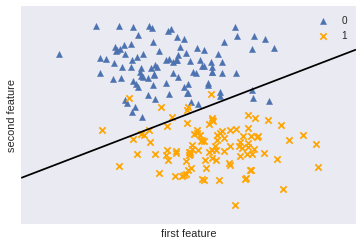

In [ ]:
import figures

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label='0', marker='^')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label='1', c='orange', marker='x')

plt.xlabel("first feature")
plt.ylabel("second feature")
figures.plot_2d_separator(classifier, X)
plt.legend(loc='upper right');

Podemos obtener otras métricas como F-Score, etc.

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score

print('Precision:', precision_score(y_test, prediction))
print('Recall:   ', recall_score(y_test, prediction))
print('Fscore:   ', f1_score(y_test, prediction))

Precision: 0.9090909090909091
Recall:    0.8
Fscore:    0.8510638297872342


Además es posible obtener los parámetros de la regresión:

In [ ]:
print(classifier.coef_)
print(classifier.intercept_)

[[ 1.43490868 -1.89220278]]
[2.26160225]


In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:
predict_proba = classifier.predict_proba(X_test)

In [ ]:
type(predict_proba)

numpy.ndarray

In [ ]:
predict_proba[:,1]

array([8.54699884e-01, 2.09820256e-03, 4.03376438e-03, 9.91401382e-01,
       3.02853911e-02, 3.30481503e-02, 9.92413430e-01, 1.03746003e-02,
       9.41087500e-01, 5.11949077e-01, 5.92657030e-01, 8.88890942e-02,
       8.38898591e-01, 9.01181637e-01, 1.89880471e-01, 9.83642645e-01,
       7.16066814e-03, 2.64330500e-03, 4.04198015e-01, 1.37470031e-01,
       3.31071065e-04, 9.82327982e-01, 3.33424609e-02, 4.77260586e-02,
       4.30597491e-01, 4.01023271e-04, 9.91914850e-01, 8.42815047e-05,
       3.69806386e-02, 9.41660316e-01, 8.21664814e-01, 9.89379580e-01,
       6.27704134e-04, 1.12546665e-02, 1.69344036e-02, 6.86519181e-03,
       2.46249689e-02, 9.92017256e-01, 9.98054124e-01, 9.97276942e-01,
       3.86648561e-04, 3.52935338e-02, 4.30516792e-03, 9.40769226e-01,
       3.52164590e-01, 9.84417250e-01, 9.96285759e-01, 5.51540113e-03,
       5.93045490e-01, 9.64966144e-01])

In [ ]:
roc_auc_score(y_test,predict_proba[:,1])

0.9743999999999999

In [ ]:
auc = roc_auc_score(y_test,predict_proba[:,1])
auc


0.9743999999999999

In [ ]:
y_test.shape

(50,)

In [ ]:
predict_proba[:,1].shape

(50,)

In [ ]:
roc_curve(y_test,predict_proba[:,1],pos_label=1)

(array([0.  , 0.  , 0.04, 0.04, 0.08, 0.08, 0.24, 0.24, 1.  ]),
 array([0.04, 0.72, 0.72, 0.8 , 0.8 , 0.96, 0.96, 1.  , 1.  ]),
 array([9.98054124e-01, 8.38898591e-01, 8.21664814e-01, 5.92657030e-01,
        5.11949077e-01, 1.89880471e-01, 3.69806386e-02, 3.52935338e-02,
        8.42815047e-05]))

In [ ]:
fpr, tpr, treshold = roc_curve(y_test,predict_proba[:,1])

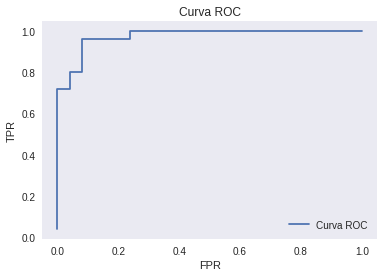

In [ ]:
fig, ax = plt.subplots()
#plot sine wave
ax.plot(fpr, tpr, label = "Curva ROC")
ax.set(xlabel='FPR', ylabel='TPR',
       title='Curva ROC')
ax.grid()

#show the legend
plt.legend()
plt.show()